In [1]:
import pandas as pd 
import datetime
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday
from pandas.tseries.offsets import CustomBusinessDay
"""День недели
Месяц
Выходной день
Праздничный день
Предпраздничный рабочий день
Последний день месяца
Последний рабочий день месяца
Предновогодний выходной день"""

'День недели\nМесяц\nВыходной день\nПраздничный день\nПредпраздничный рабочий день\nПоследний день месяца\nПоследний рабочий день месяца\nПредновогодний выходной день'

In [3]:
data=pd.read_csv('data-20181017t0930-structure-20181017t0930_5.csv')



In [4]:
holiday = []
for i in range(data.shape[0]):
    row = data.iloc[i]
    year = int(data.iloc[i]['Год/Месяц'])
    for i_month, month_name in enumerate(data.columns [1:13]):
        month = i_month + 1
        for day_str in row[month_name].split(','):
            if day_str[-1] !='*':
                if day_str[-1] =='+':
                    day_str = day_str[:-1]
                day = int(day_str)
                holiday.append(datetime.datetime(year, month, day))


In [5]:
holiday_df = pd.DataFrame(holiday, columns=['holidays'])
holiday_df.index = pd.to_datetime(holiday)
holiday_df = holiday_df.sort_index()
holiday_df.to_csv('./holidays_df.csv', index=False)

In [6]:
holiday_df.head()

,holidays
1999-01-01,1999-01-01
1999-01-02,1999-01-02
1999-01-03,1999-01-03
1999-01-04,1999-01-04
1999-01-07,1999-01-07


In [7]:
class RussianBusinessCalendar(AbstractHolidayCalendar): 
    start_date = datetime.datetime(1999, 1, 1)
    end_date = datetime.datetime(2019, 12, 31)
    rules = [
        Holiday(name='Russian Day Off', year=d.year, month=d.month, day=d.day)
        for d in pd.to_datetime(holiday_df['holidays'])
    ]


In [8]:
russian_busday = CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri Sat Sun', calendar=RussianBusinessCalendar())

In [9]:
events = pd.DataFrame(index=pd.date_range('2014-01-01', '2019-12-31'))
events = pd.merge(events, holiday_df, how='left', left_index=True, right_index=True).fillna('Work')
events.index = pd.to_datetime(events.index)


In [10]:
#Дни недели
for i, name in enumerate( [' ПН', 'BT', ' СР', ' ЧT ', 'ПТ', ' СБ', ' BC ' ]):
    events[name] = [1 if day == i else 0 for day in events.index.weekday]
#Месяцы
for i, name in enumerate( [' Январь', 'Февраль', "Март", 'Апрель', 'Maй', 'Июнь','Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']):
    events[name] = [1 if month == i + 1 else 0 for month in events.index.month]

In [11]:
events.loc[events.holidays
           != 'Work', 'holidays'] = 1
events.loc[events.holidays == 'Work', 'holidays'] = 0
events.rename(columns={'holidays':'Выходной'}, inplace=True)

In [12]:
events.head()#Выходные

,Выходной,ПН,BT,СР,ЧT,ПТ,СБ,BC,Январь,Февраль,Март,Апрель,Maй,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь
2014-01-01,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-02,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-03,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-04,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-05,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [13]:
#Праздники
events ["Праздник"] = [0 for _ in range(events.shape[0])]
events.loc[(events.index.day.isin([1, 2, 3, 4, 5, 6, 7, 8]))
           & (events.index.month == 1), 'Праздник'] = 1
events.loc[(events.index.day ==23) & (events.index.month == 2),'Праздник'] = 1 
events.loc[(events.index.day ==8)&(events.index.month==3),'Праздник']=1
events.loc[(events.index.day ==1)&(events.index.month==5),'Праздник']=1
events.loc[(events.index.day ==9)&(events.index.month==5),'Праздник']=1
events.loc[(events.index.day ==12) & (events.index.month == 6),'Праздник'] = 1 
events.loc[(events.index.day ==4) & (events.index.month == 11), 'Праздник'] = 1

In [14]:
events.head()

,Выходной,ПН,BT,СР,ЧT,ПТ,СБ,BC,Январь,Февраль,...,Апрель,Maй,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Праздник
2014-01-01,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2014-01-02,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2014-01-03,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2014-01-04,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2014-01-05,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
#Предпраздничный день
holidays = events[events['Праздник'] == 1].index
inds = [datetime.datetime(day.year, day.month, day.day) + pd.Timedelta(days=1) - russian_busday for day in holidays]
events ['Предпраздничный день'] = [0 for _ in range(events.shape[0]) ]
events.loc[events.index.isin(inds), 'Предпраздничный день'] = 1

In [16]:
#Последний день и последний рабочий день месяца
month_lastdays = [pd.to_datetime(str(year)) + pd.offsets.MonthEnd(i) for year in events.index.year.unique()
                  for i in range(1, 13)]
events['Последний день'] = [0 for _ in range(events.shape[0])]
events.loc[events.index.isin(month_lastdays), 'Последний день'] = 1

inds = [datetime.datetime(day.year, day.month, day.day) + pd.Timedelta(days=1) - russian_busday for day in month_lastdays]
events['Последний рабочий день месяца'] = [0 for _ in range(events.shape[0])]
events.loc[events.index.isin(inds), 'Последний рабочий день месяца'] = 1


In [17]:
#Предновогодний выходной день
events['Предновогодний выходной день'] = [1 if x == (events.index.max() - pd.offsets.Week(weekday=6) \
                                                     if events.index.max().weekday() < 6 \
                                                     else events.index.max()- pd.offsets.Day())\
                                            else 0 for x in events.index]
events.head()

,Выходной,ПН,BT,СР,ЧT,ПТ,СБ,BC,Январь,Февраль,...,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Праздник,Предпраздничный день,Последний день,Последний рабочий день месяца,Предновогодний выходной день
2014-01-01,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2014-01-02,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2014-01-03,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2014-01-04,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2014-01-05,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


# 
Для временного ряда курса акций Сбербанка на основе производственного календаря России сформируйте DataFrame признаков:

Лаговые переменные рабочих дней с глубинами: 1, 3, 5

Скользящие статистики ['mean', 'median', 'max', 'min', 'std'] с окнами 1, 3, 5 сгрупированные по дням недели

Статистики ['mean', 'median', 'max', 'min', 'std'] в расширяющемся окне сгруппированные по рабочим, праздничным и предпраздничным дням

<AxesSubplot:xlabel='TRADEDATE'>

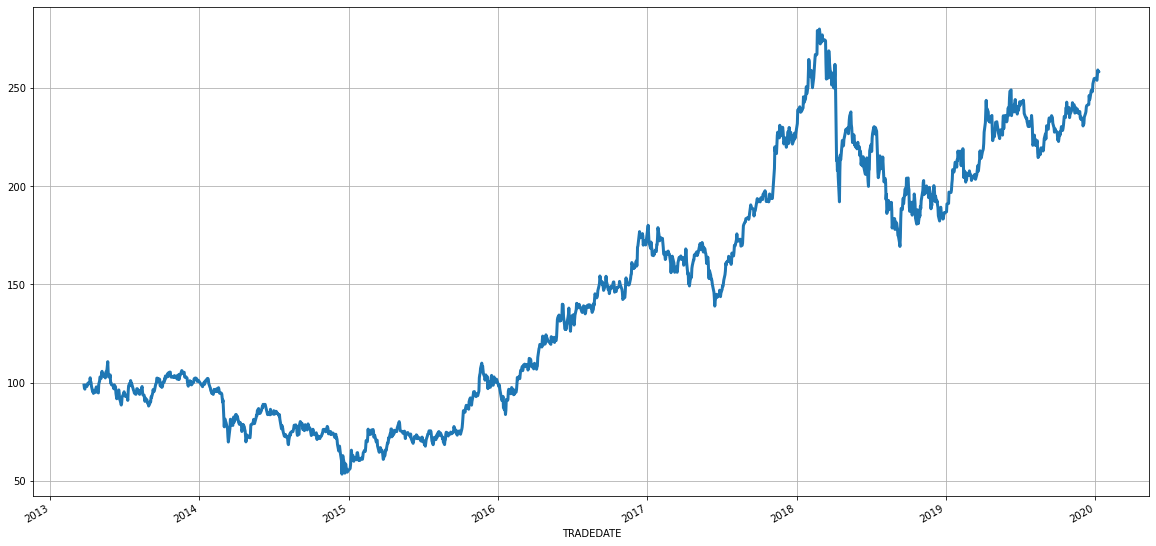

In [18]:
ts = pd.read_csv(r'C:\Users\User\Downloads\sberbank_data_analysis-master\sberbank_data_analysis-master\data\sber_stocks.csv', usecols=['CLOSE', 'TRADEDATE'], index_col='TRADEDATE', parse_dates=True)
ts = ts.CLOSE

ts.plot(figsize=(20, 10), grid=True, linewidth=3)

In [19]:
ts = pd.DataFrame(ts)
ts['weekday'] = ts.index.weekday

In [20]:
events=pd.DataFrame(events)
events.head()

,Выходной,ПН,BT,СР,ЧT,ПТ,СБ,BC,Январь,Февраль,...,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Праздник,Предпраздничный день,Последний день,Последний рабочий день месяца,Предновогодний выходной день
2014-01-01,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2014-01-02,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2014-01-03,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2014-01-04,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2014-01-05,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
ts.shape

(1712, 2)

In [22]:
data=ts.merge(events, left_on='TRADEDATE',right_index=True, )

In [23]:
data.head()

,CLOSE,weekday,Выходной,ПН,BT,СР,ЧT,ПТ,СБ,BC,...,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Праздник,Предпраздничный день,Последний день,Последний рабочий день месяца,Предновогодний выходной день
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2014-01-06,98.91,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2014-01-08,98.19,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2014-01-09,98.00,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-01-10,99.20,4,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-01-13,100.25,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
shift_1=data.asfreq('1D').fillna(method='ffill').shift(1, freq=pd.offsets.CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri Sat Sun', calendar=RussianBusinessCalendar()))
shift_3=data.asfreq('1D').fillna(method='ffill').shift(3, freq=pd.offsets.CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri Sat Sun', calendar=RussianBusinessCalendar()))
shift_5=data.asfreq('1D').fillna(method='ffill').shift(5, freq=pd.offsets.CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri Sat Sun', calendar=RussianBusinessCalendar()))

D:\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:691: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(


<AxesSubplot:xlabel='TRADEDATE'>

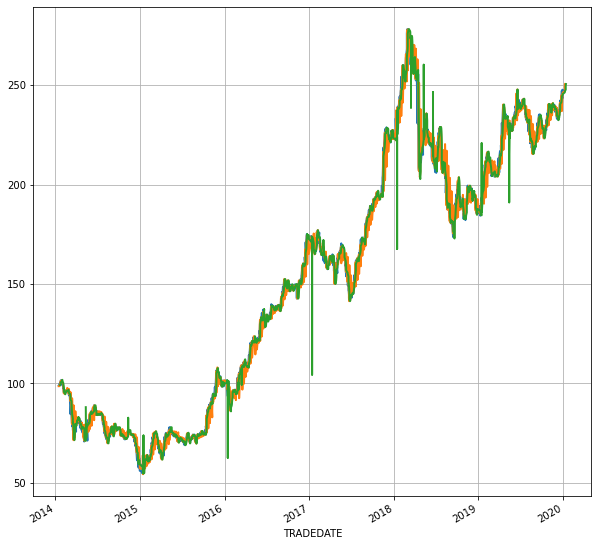

In [29]:
shift_1.groupby('ПТ')['CLOSE'].transform(lambda x: x.rolling(window=5).mean().shift(1)).plot(figsize=(10, 10), lw=2, grid=True)
shift_3.groupby('BT')['CLOSE'].transform(lambda x: x.rolling(window=5).mean().shift(1)).plot(figsize=(10, 10), lw=2, grid=True)
shift_5.groupby('Выходной')['CLOSE'].transform(lambda x: x.rolling(window=5).mean().shift(1)).plot(figsize=(10, 10), lw=2, grid=True)

# Дальше не сообразил как действовать